* Data Source: https://bulkdata.uspto.gov/data2/patent/grant/redbook/fulltex
 * Patent Application Full Text Data (No Images) (2005-2010)\
 * Contains the full text of each patent application (non-provisional utility and plant)
 * Subset of the Patent Application Full Text Data with Embedded TIFF Images.


In [12]:
# %load loadData_workflow/loadData.py
#!/usr/bin/env python3
"""
Created on Sat Jul  1 13:21:26 2017
import pandas as pd

@author: sheeroh
"""
import os
import pandas as pd 



os.chdir('/Users/sheeroh/Box Sync/2_projects/insightDSNYC/data/initcsv_data')

csvFiles = ['ipg050111.csv','ipg050426.csv','ipg060425.csv', 'ipg060711.csv', 'ipg070227.csv','ipg070116.csv', 
           'ipg080902.csv', 'ipg081216.csv', 'ipg090818.csv', 'ipg090203.csv', 'ipg101214.csv', 'ipg100713.csv',
           'ipg110419.csv', 'ipg110419.csv', 'ipg111101.csv', 'ipg120626.csv', 'ipg120626.csv', 'ipg130423.csv', 
           'ipg131001.csv', 'ipg140909.csv', 'ipg141125.csv', 'ipg150407.csv', 'ipg150728.csv']
list_ = []
for files in csvFiles:
    df = pd.read_csv(files, index_col=0, header=0)
    list_.append(df)
    frame = pd.concat(list_, ignore_index=True)
    
#rename column orgnames to company
frame = frame.rename (columns ={'orgnames':'company'})
frame = frame.rename (columns ={'doc_number':'patent_number'})

# all patent documents are US filed-drop the country column
frame = frame.drop(['country'], axis=1)
#drop null values
frame =frame.dropna()

frame['DateTime'] = frame['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

#create new column with month and year
frame['year'] = pd.DatetimeIndex(frame['DateTime']).year
frame['month'] = pd.DatetimeIndex(frame['DateTime']).month
frame = frame.drop('date', axis =1,inplace =False)
frame = frame.drop('month', axis =1,inplace =False)
frame = frame.drop('DateTime', axis =1,inplace =False)

#drop idxcolumns with column names where the first three letters of the column names are strings
frame = frame[frame.patent_number.str.contains("PP") == False]
frame = frame[frame.patent_number.str.contains("RE") == False]
frame = frame[frame.patent_number.str.contains("D") == False]

#since I removed some rows, here I want to reset index
frame = frame.reset_index(drop=True)

#check if all data has been successfully loaded
print("Shape of data: {}".format(frame.shape))

#Check all data has been successfully loaded (array shape):
print("First two columns of data:\n{}".format(frame[:2]))

print("Type of data: {}".format(type(frame)))

#check if dataframe has the correct number of columns
frame.head()

#to save the dataframe, frame to patdocs_clean.pkl
frame.to_pickle('/Users/sheeroh/Box Sync/2_projects/insightDSNYC/data/patdocs_clean.pkl', compression ='infer')
         

Shape of data: (98511, 7)
First two columns of data:
                                            abstract  \
0  A head-worn shading visor includes a visor bla...   
1  A protective skin device that may be used to p...   

                                              claims  \
0  1. A head-worn shading visor comprising a viso...   
1  1. A skin protection device for fingers and/or...   

                                         description patent_number  \
0  Hat is a commonly used article for shading pur...      06839904   
1  In one embodiment, the device includes a sheat...      06839905   

                                    invention_title  \
0                           Head-worn shading visor   
1  Skin protection device for fingers and/or thumbs   

                        company  year  
0  Toyo Boseki Kabushiki Kaisha  2005  
1             Brublake Co., LLC  2005  
Type of data: <class 'pandas.core.frame.DataFrame'>


In [13]:
#check if all data has been successfully loaded
frame.head()

,abstract,claims,description,patent_number,invention_title,company,year
0,A head-worn shading visor includes a visor bla...,1. A head-worn shading visor comprising a viso...,Hat is a commonly used article for shading pur...,06839904,Head-worn shading visor,Toyo Boseki Kabushiki Kaisha,2005
1,A protective skin device that may be used to p...,1. A skin protection device for fingers and/or...,"In one embodiment, the device includes a sheat...",06839905,Skin protection device for fingers and/or thumbs,"Brublake Co., LLC",2005
2,A joint protector of high strength impact resi...,1. A high strength impact resistant knee prote...,This application is a continuation-in-part of ...,06839906,High strength impact resistant knee protector,"Brublake Co., LLC",2005
3,"An apron-like, unisex garment is disclosed, ha...","1. An apron-like, unisex garment which ties ar...",The present invention concerns an apron&#x2014...,06839907,Craftworker's apron,"Brublake Co., LLC",2005
4,This invention provides women's apparel having...,1. A breast support apparel comprising: a pair...,This invention provides women's apparel having...,06839908,Maternity and/or nursing breast support for fa...,NurtureBra LLC,2005


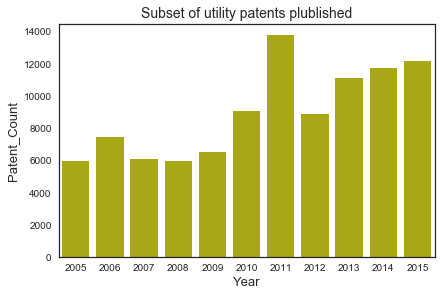

In [101]:
#/Users/sheeroh/Box Sync/2_projects/insightDSNYC
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")
plt.figure(figsize=(6,4))

ax = sns.countplot(x="year", data=frame, color="Y")
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Patent_Count', fontsize=13)
ax.set_title ('Subset of utility patents plublished',fontsize=14)
plt.savefig('../../figures/subset_of_utility_patents_published .png')

In [82]:
#check if all data has been successfully loaded
#print("Shape of data: {}".format(frame.shape))

In [ ]:
#Check all data has been successfully loaded (array shape):
#print("First two columns of data:\n{}".format(frame[:2]))

In [ ]:
#drop idxcolumns with column names where the first three letters of the column names are strings
#frame = frame[frame.doc_number.str.contains("PP") == False]
#frame = frame[frame.doc_number.str.contains("RE") == False]
#frame = frame[frame.doc_number.str.contains("D") == False]

In [ ]:
#frame.set_index("doc_number", inplace=False)

In [ ]:
frame.head(100)

In [ ]:

frame['year'].value_counts().plot(kind='bar')

In [ ]:
#to save the dataframe, df to 123.pkl
#frame.to_pickle('/Users/sheeroh/Box Sync/2_projects/insightDSNYC/data/patdocs_clean.pkl', compression ='infer')

In [ ]:
#patdocs = pd.read_pickle( 'patdocs_clean.pkl')

### Summary of this section:
1. downloaded data and converted into csv files- to work in pandas-I am sure there is a better way, but would be interesting to look at that later.
2. Renamed the column orgnames to company -makes sense to name company as opposed to orgnames, and doc_number to patent_number (-Need to change this in the python script)
3. I converted the date column  to a datetime column and then filter based on date and year.
4. I dropped columns (data, country, month)- I want to apply the filter based on year, although it would be also interesting to filter by month? 
5. Since i want to look at utility patents, I dropped all columns with patent number starting with  "PP" "RE", which refelcts plant patents and reissue patents respectively. 
6. Created a python package, loadData_workflow, to call the loadData.py script- makes it easier to load the data.
7. Saved the dataframe as a pickle file extension. 


